# simulate clusters of proteines with blinking

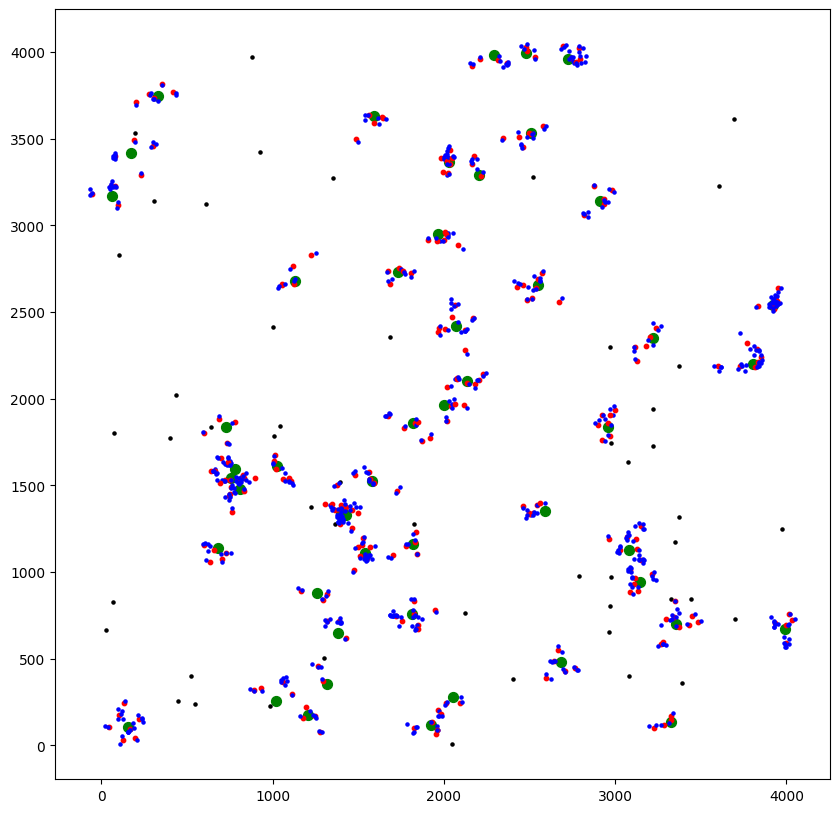

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


H = 4000
W = H
number_of_clusters = 50
mean_number_of_proteins = 6
stddev_number_of_proteins = 1.5
stdev_cluster_radius = 60
p_geo = 0.45
stdev_loc_prec = 15

noise_level = 1.0

disp = True

cluster_coord = np.random.randint(0, H, size=(number_of_clusters, 2))
noise_coord = np.random.randint(0, H, size=(int(number_of_clusters * noise_level), 2))

index_protein = 0

data= []

# comenca a generar csv amb noise_coord posant index protein a 0

if disp:
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(cluster_coord[:, 0], cluster_coord[:, 1], color='green', s=50, label='Cluster Centers')
    plt.scatter(noise_coord[:, 0], noise_coord[:, 1], color='black', s=5, label='Noise')

for i in range(number_of_clusters):
    number_of_proteins=np.random.normal(mean_number_of_proteins, stddev_number_of_proteins)
    number_of_proteins = number_of_proteins if number_of_proteins > 0 else 1  

    for j in range(int(number_of_proteins)):
        index_protein = index_protein + 1
        x = cluster_coord[i, 0] + np.random.normal(0, stdev_cluster_radius)
        y = cluster_coord[i, 1] + np.random.normal(0, stdev_cluster_radius)

        if disp:
            plt.scatter(x, y, color='red', s=10)

        number_of_locs = np.random.geometric(p=p_geo)
        for k in range(number_of_locs):
            x_loc = x + np.random.normal(0, stdev_loc_prec)
            y_loc = y + np.random.normal(0, stdev_loc_prec)

            data.append([x_loc, y_loc, index_protein])

            if disp:
                plt.scatter(x_loc, y_loc, color='blue', s=5)

for i in range(len(noise_coord)):
    x_noise = noise_coord[i, 0]
    y_noise = noise_coord[i, 1]
    data.append([x_noise, y_noise, 0])


In [9]:
number_of_locs = np.random.geometric(p=0.45, size=100)
print(  number_of_locs)

[1 1 1 1 8 3 2 2 1 3 1 1 1 1 1 2 1 3 2 2 2 3 2 1 5 1 6 1 2 2 3 1 4 1 4 1 1
 1 1 4 2 1 1 2 1 1 8 1 1 1 2 1 3 2 2 1 1 1 2 2 1 4 1 1 1 1 3 1 3 4 2 1 2 1
 2 1 4 2 2 2 1 2 1 1 3 2 1 6 5 2 3 1 3 2 1 2 2 4 4 4]


In [ ]:
output_folder = "csv_generats"
os.makedirs(output_folder, exist_ok=True)

df = pd.DataFrame(data, columns=["x", "y", "index"])

base_name = "simulated_clusters"
extension = ".csv"

# Fer que no es creïn fitxers amb el mateix nom, si ja existeix, afegir un número al final del nom del fitxer
counter = 1
while True:
    if counter == 1:
        filename = f"{base_name}{extension}"
    else:
        filename = f"{base_name}_{counter}{extension}"
    
    output_path = os.path.join(output_folder, filename)
    
    if not os.path.exists(output_path):
        break
    
    counter = counter + 1

# Guardar CSV amb el nom i les columnes corresponents per despres poder llegir-lo
df = pd.DataFrame(data, columns=["x", "y", "index"])
df.to_csv(output_path, index=False)

print(f"CSV guardado en: {output_path}")